# Homework 12 (Solution)

In [21]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [22]:
# load and preprocess data
df0 = pd.read_hdf('/work/ma384/DataSets/Crime/ChicagoCrime2017-12-08.h5')
df0.head(3)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4647369,HM155213,01/31/2006 12:13:05 PM,066XX N BOSWORTH AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,"SCHOOL, PUBLIC, BUILDING",True,False,...,40.0,1.0,18,1164737.0,1944193.0,2006,04/15/2016 08:55:02 AM,42.002478,-87.669297,"(42.002478396, -87.66929687)"
1,4647370,HM245080,03/21/2006 07:00:00 PM,062XX S WESTERN AVE,1330,CRIMINAL TRESPASS,TO LAND,PARKING LOT/GARAGE(NON.RESID.),True,False,...,15.0,66.0,26,1161441.0,1863309.0,2006,04/15/2016 08:55:02 AM,41.780595,-87.683676,"(41.780595495, -87.68367553)"
2,4647372,HM171175,02/09/2006 01:44:41 AM,058XX S SHIELDS AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,...,20.0,68.0,18,1174958.0,1866097.0,2006,04/15/2016 08:55:02 AM,41.787955,-87.634037,"(41.787955143, -87.634036744)"


In [23]:
# preprocess data
idx = (df0['Primary Type']=='THEFT') & (df0.Arrest==True)
df1 = df0[idx][['X Coordinate','Y Coordinate']]
df1 = df1.drop(2404077) # remove a point with (0,0) coordinates
print('before:',df1.shape)
df1 = df1.dropna()
print('after:',df1.shape)

before: (163231, 2)
after: (162232, 2)


In [24]:
df1.head(3)

,X Coordinate,Y Coordinate
76,1183056.0,1848421.0
92,1182650.0,1863246.0
260,1184243.0,1826052.0


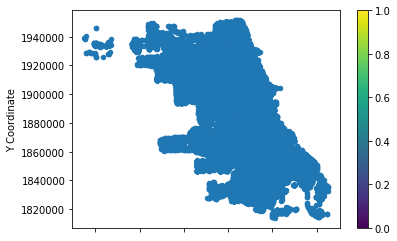

In [25]:
#a
df1.plot.scatter(x='X Coordinate',y='Y Coordinate',colormap='viridis')

In [27]:
#b
df1.values

array([[1183056., 1848421.],
       [1182650., 1863246.],
       [1184243., 1826052.],
       ...,
       [1145727., 1853720.],
       [1166985., 1841705.],
       [1145727., 1853720.]])

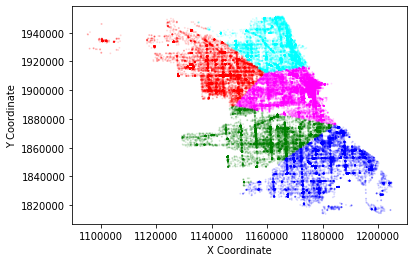

In [33]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(df1.values)
colors = pd.Series(['red', 'blue','cyan','green','magenta'])
df1.plot.scatter(x='X Coordinate',y='Y Coordinate', c = colors.iloc[kmeans.predict(df1.values)],  s=1, alpha = 0.1)